<a href="https://colab.research.google.com/github/pullz6/Micrsoft_Stock_Prediction_With_LSTM/blob/main/Time_Series_analysis_for_Microsoft_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
#connecting to Google dirve
drive.mount('/content/drive')

#loading all the required datasets
df = pd.read_csv('/content/drive/MyDrive/sample_data/Projects/Microsoft_Stock/MSFT.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-18,243.509995,243.740005,239.029999,241.220001,239.099930,27613500
1,2022-11-21,241.429993,244.669998,241.190002,242.050003,239.922638,26394700
2,2022-11-22,243.589996,245.309998,240.710007,245.029999,242.876434,19665700
3,2022-11-23,245.110001,248.279999,244.270004,247.580002,245.404022,19508500
4,2022-11-25,247.309998,248.699997,246.729996,247.490005,245.314819,9200800


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
print (df.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [ ]:
df = df[['Date','Close']]

In [ ]:
df.index = df.pop('Date')

In [ ]:
df

,Close
Date,
2022-11-18,241.220001
2022-11-21,242.050003
2022-11-22,245.029999
2022-11-23,247.580002
2022-11-25,247.490005
...,...
2023-11-13,366.679993
2023-11-14,370.269989
2023-11-15,369.670013


In [ ]:
print(df)

                 Close
Date                  
2022-11-18  241.220001
2022-11-21  242.050003
2022-11-22  245.029999
2022-11-23  247.580002
2022-11-25  247.490005
...                ...
2023-11-13  366.679993
2023-11-14  370.269989
2023-11-15  369.670013
2023-11-16  376.170013
2023-11-17  369.850006

[251 rows x 1 columns]


In [ ]:
def window_data(data, n=3):
    windowed_data = pd.DataFrame()
    for i in range(n, 0, -1):
        windowed_data[f'Target-{i}'] = data['Close'].shift(i)
    windowed_data['Target'] = data['Close']
    return windowed_data.dropna()

windowed_df = window_data(df)

In [ ]:
windowed_df

,Target-3,Target-2,Target-1,Target
Date,,,,
2022-11-23,241.220001,242.050003,245.029999,247.580002
2022-11-25,242.050003,245.029999,247.580002,247.490005
2022-11-28,245.029999,247.580002,247.490005,241.759995
2022-11-29,247.580002,247.490005,241.759995,240.330002
2022-11-30,247.490005,241.759995,240.330002,255.139999
...,...,...,...,...
2023-11-13,363.200012,360.690002,369.670013,366.679993
2023-11-14,360.690002,369.670013,366.679993,370.269989
2023-11-15,369.670013,366.679993,370.269989,369.670013


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()
  dates = windowed_dataframe.index.to_numpy()

  middle_matrix = df_as_np[:, 0:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((248,), (248, 3, 1), (248,))

In [ ]:
dates

array(['2022-11-23T00:00:00.000000000', '2022-11-25T00:00:00.000000000',
       '2022-11-28T00:00:00.000000000', '2022-11-29T00:00:00.000000000',
       '2022-11-30T00:00:00.000000000', '2022-12-01T00:00:00.000000000',
       '2022-12-02T00:00:00.000000000', '2022-12-05T00:00:00.000000000',
       '2022-12-06T00:00:00.000000000', '2022-12-07T00:00:00.000000000',
       '2022-12-08T00:00:00.000000000', '2022-12-09T00:00:00.000000000',
       '2022-12-12T00:00:00.000000000', '2022-12-13T00:00:00.000000000',
       '2022-12-14T00:00:00.000000000', '2022-12-15T00:00:00.000000000',
       '2022-12-16T00:00:00.000000000', '2022-12-19T00:00:00.000000000',
       '2022-12-20T00:00:00.000000000', '2022-12-21T00:00:00.000000000',
       '2022-12-22T00:00:00.000000000', '2022-12-23T00:00:00.000000000',
       '2022-12-27T00:00:00.000000000', '2022-12-28T00:00:00.000000000',
       '2022-12-29T00:00:00.000000000', '2022-12-30T00:00:00.000000000',
       '2023-01-03T00:00:00.000000000', '2023-01-04

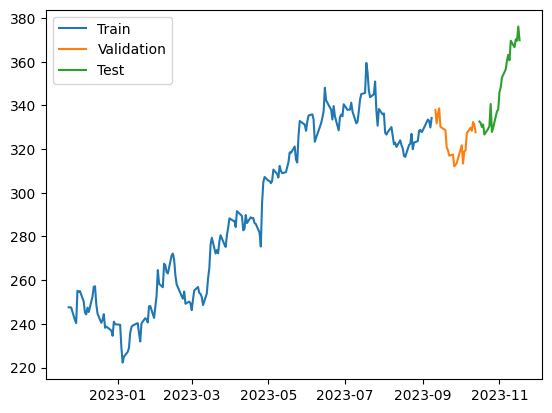

In [ ]:
import matplotlib.pyplot as plt

q_80 = int(len(dates) * .8)

q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 5s 175ms/step - loss: 85953.3750 - mean_absolute_error: 290.6465 - val_loss: 104955.8125 - val_mean_absolute_error: 323.8686
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 85584.1797 - mean_absolute_error: 290.0132 - val_loss: 104503.4375 - val_mean_absolute_error: 323.1695
Epoch 3/100
7/7 [==============================] - 0s 19ms/step - loss: 85184.6953 - mean_absolute_error: 289.3236 - val_loss: 104077.8828 - val_mean_absolute_error: 322.5104
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 84793.8594 - mean_absolute_error: 288.6472 - val_loss: 103602.5469 - val_mean_absolute_error: 321.7726
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 84340.4375 - mean_absolute_error: 287.8573 - val_loss: 103028.8203 - val_mean_absolute_error: 320.8798
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 83730.6641 - mean_absolute_error: 286.7936 - val_los

7/7 [==============================] - 1s 5ms/step


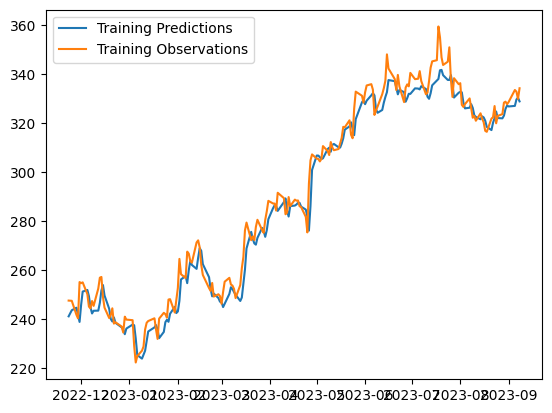

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 61ms/step


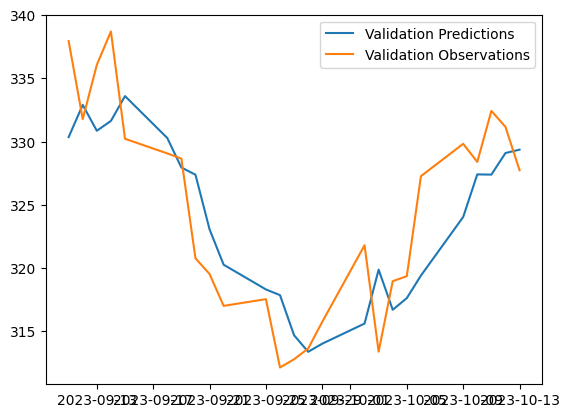

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 33ms/step


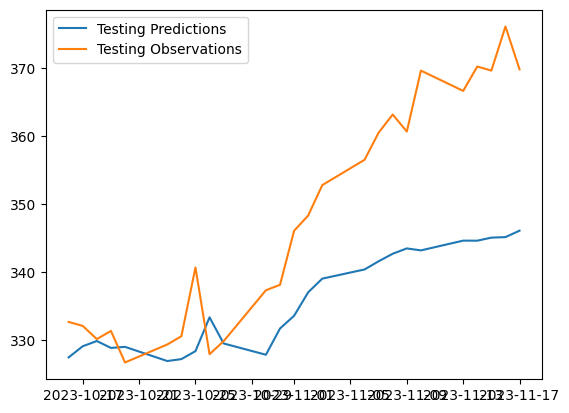

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

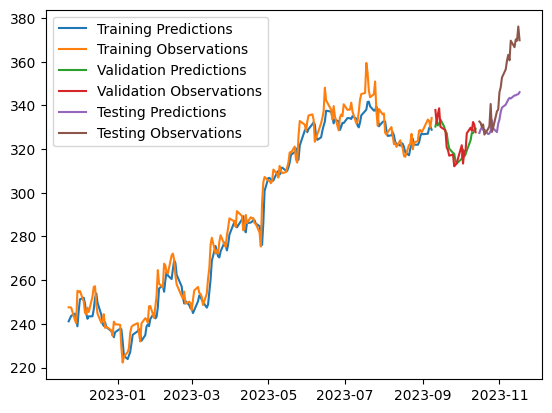

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])